## Seminář obecné psychologie - Inteligence

### Výzkumné cíle: 
- Srovnání výsledků skupiny studentů s dostupnými normami, resp. s výsledky získanými v rámci validizačních studií
- Odhad míry nezávislosti konstruktů měřených jednotlivými testy

### Měřené proměnné: 
- Obecná inteligence
- Kognitivní reflexivita
- Tendence podléhat kognitivním zkreslením
- Emoční inteligence
- Sociální inteligence (Social Information Processing, Social Skills, Social Awareness)
- Osobnostní rysy (Extraverze, Přívětivost, Svědomitost, Emoční stabilita, Otevřenost ke zkušenosti)

### Metody: 
- 16 PF (Faktor B) (Cattell, 1998)
- CRT-L2 (Frederick, 2005; Primi et al., 2015; Toplak, West, & Stanovich, 2014)
- Sada 6 úloh inspirovaných výzkumem heuristik a zkreslení, které zjišťují některé aspekty racionálního myšlení (Toplak, West, & Stanovich, 2011)
- Measure of Emotional Intelligence (Schutte et al., 1998)
- Tromsø Social Intelligence Scale (Silvera, Martinussen, & Dahl, 2001)
- TIPI (Gosling, Rentfrow, & Swann, 2003)

### Data

In [173]:
# Načtěme si knihovny, které budeme potřebovat pro načtení dat a jejich přípravu na následnou analýzu a vizualizaci. 
library(tidyverse)

# Načtěme si naše data a podívejme se na jejich strukturu.
myData <- read_delim('Data_Inteligence.csv', delim = ";")
glimpse(myData)

Parsed with column specification:
cols(
  Vek = col_integer(),
  Pohlavi = col_integer(),
  Obecna_inteligence = col_integer(),
  CRT_Long = col_integer(),
  Cognitive_Biases_Sum = col_integer(),
  Emocni_inteligence = col_integer(),
  Social_information_processing = col_integer(),
  Social_skills = col_integer(),
  Social_awareness = col_integer(),
  Extraverze = col_double(),
  Privetivost = col_double(),
  Svedomitost = col_double(),
  Emocni_stabilita = col_double(),
  Otevrenost = col_double()
)


Observations: 65
Variables: 14
$ Vek                           <int> 20, 20, 21, 21, 23, 21, 19, 20, 19, 2...
$ Pohlavi                       <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...
$ Obecna_inteligence            <int> 11, NA, 10, 12, NA, 12, 11, 13, 13, 1...
$ CRT_Long                      <int> 5, NA, 8, 6, NA, 5, 8, 5, NA, 3, NA, ...
$ Cognitive_Biases_Sum          <int> 2, NA, 2, 4, NA, 2, 3, 2, NA, 2, NA, ...
$ Emocni_inteligence            <int> 127, NA, 161, 101, NA, 133, 144, 121,...
$ Social_information_processing <int> 33, NA, 48, 29, NA, 45, 42, 38, 44, 3...
$ Social_skills                 <int> 33, NA, 47, 21, NA, 45, 36, 37, 26, 3...
$ Social_awareness              <int> 36, NA, 36, 22, NA, 43, 44, 46, 38, 4...
$ Extraverze                    <dbl> 4.0, 5.5, 6.0, NA, NA, 6.0, 4.5, NA, ...
$ Privetivost                   <dbl> 5.5, 4.5, 5.5, NA, NA, 5.0, 4.5, NA, ...
$ Svedomitost                   <dbl> 6.5, 3.5, 6.5, NA, NA, 7.0, 5.5, NA, ...
$ Emocni_stabilita   

In [174]:
# Upravme proměnnou 'Pohlaví' na kategoriální proměnnou se smyslupným označením jejích jednotlivých úrovní  
myData$Pohlavi <- as.factor(ifelse(myData$Pohlavi == 1, "M", "F"))

### Popis výzkumného souboru

In [221]:
# Z hlediska věku
library(Hmisc)
myData %>%
filter(is.na(Obecna_inteligence) == F, 
       is.na(Emocni_inteligence) == F, 
       is.na(Social_information_processing) == F, 
       is.na(Social_skills) == F,
       is.na(Social_awareness) == F) %>%
select(Vek) %>%
Hmisc::describe()

. 

 1  Variables      44  Observations
--------------------------------------------------------------------------------
Vek 
       n  missing distinct     Info     Mean      Gmd 
      44        0        7    0.916    20.84     2.35 
                                                    
Value         19    20    21    22    24    26    43
Frequency     12    17     8     4     1     1     1
Proportion 0.273 0.386 0.182 0.091 0.023 0.023 0.023
--------------------------------------------------------------------------------

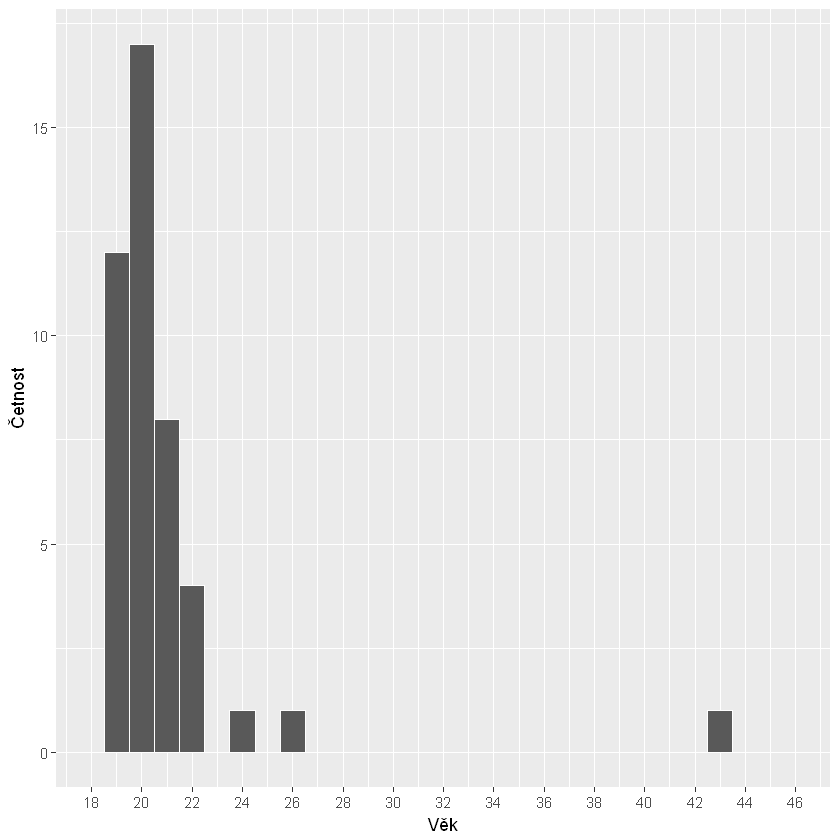

In [211]:
myData %>%
filter(is.na(Obecna_inteligence) == F, 
       is.na(Emocni_inteligence) == F, 
       is.na(Social_information_processing) == F, 
       is.na(Social_skills) == F,
       is.na(Social_awareness) == F) %>%
select(Vek) %>%
ggplot(aes(Vek))+
geom_histogram(color = "white", binwidth = 1)+
scale_x_continuous(breaks = seq(18, 46, 2), limits = c(18, 46))+
xlab("Věk")+
ylab("Četnost")

In [183]:
# Z hlediska pohlaví
table(myData$Pohlavi)
round(prop.table(table(myData$Pohlavi)),2)


 F  M 
55 10 


   F    M 
0.85 0.15 

### Popisná statistika

In [150]:
library(psych)

myData %>%
select(-Vek, -Pohlavi) %>%
psych::describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Obecna_inteligence,1,46,11.565217,1.5585203,12.0,11.552632,1.48260,9.0,15.0,6.0,0.070929719,-0.78236706,0.2297913
CRT_Long,2,37,5.918919,2.0999785,6.0,6.032258,2.96520,1.0,9.0,8.0,-0.333766051,-0.65458327,0.3452343
Cognitive_Biases_Sum,3,37,1.918919,1.0375821,2.0,1.935484,1.48260,0.0,4.0,4.0,0.010816303,-0.72373223,0.1705774
Emocni_inteligence,4,47,126.744681,12.1984819,125.0,126.641026,8.89560,99.0,161.0,62.0,0.297770704,0.35777018,1.7793315
Social_information_processing,5,47,39.489362,4.6197701,39.0,39.641026,4.44780,29.0,49.0,20.0,-0.373280330,0.01462936,0.6738627
Social_skills,6,47,33.127660,7.9799123,33.0,33.256410,10.37820,16.0,47.0,31.0,-0.170828653,-1.02684616,1.1639898
Social_awareness,7,45,38.755556,5.8002961,39.0,39.351351,5.93040,22.0,48.0,26.0,-0.897669515,0.53583624,0.8646571
Extraverze,8,42,4.142857,1.3264923,4.0,4.147059,1.48260,1.0,6.5,5.5,-0.064171692,-0.76031006,0.2046822
Privetivost,9,42,5.297619,0.7813335,5.0,5.264706,0.74130,3.5,7.0,3.5,0.145744518,-0.80681918,0.1205624
Svedomitost,10,42,5.369048,1.2200536,5.5,5.470588,1.48260,1.5,7.0,5.5,-0.951216912,0.88877406,0.1882584


### Inferenční statistika